In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Decision_tree_and_Naive_Bayes.csv")
df = df.drop(columns=["Unnamed: 0"])

In [3]:
df.head()

,Visib_miles,Humidity,Cloud,Feels_like_c,wind_north_direction,snow_or_not
0,0.0,6.0,0.714286,0,no,no_snow
1,0.0,6.0,0.688312,0,no,no_snow
2,0.0,6.0,0.662338,0,no,no_snow
3,0.0,6.0,0.545455,0,no,no_snow
4,0.0,6.0,0.532468,0,no,no_snow


In [4]:
df = df.drop(columns=[ "wind_north_direction", "Humidity"])

In [5]:
df.head()

,Visib_miles,Cloud,Feels_like_c,snow_or_not
0,0.0,0.714286,0,no_snow
1,0.0,0.688312,0,no_snow
2,0.0,0.662338,0,no_snow
3,0.0,0.545455,0,no_snow
4,0.0,0.532468,0,no_snow


In [6]:
df['snow_or_not'].value_counts()

no_snow           3637
chance_of_snow    1403
Name: snow_or_not, dtype: int64

In [7]:
df_1 = df[df["snow_or_not"] == "no_snow"].sample(n=1000, random_state=42)
df_2 = df[df["snow_or_not"] == "chance_of_snow"].sample(n=1000, random_state=42)

In [8]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [9]:
df.head()

,Visib_miles,Cloud,Feels_like_c,snow_or_not
0,0.00,0.636364,34,no_snow
1,0.00,0.272727,3,no_snow
2,0.17,0.935065,90,no_snow
3,0.00,0.753247,75,no_snow
4,1.79,0.506494,90,no_snow


In [10]:
df['snow_or_not'].value_counts()

no_snow           1000
chance_of_snow    1000
Name: snow_or_not, dtype: int64

In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=321)

In [12]:
train_df.head()

,Visib_miles,Cloud,Feels_like_c,snow_or_not
234,0.00,0.285714,9,no_snow
737,0.09,0.909091,100,no_snow
601,0.00,0.779221,51,no_snow
1414,2.21,0.766234,60,chance_of_snow
1945,1.96,0.883117,100,chance_of_snow


In [13]:
test_df.head()

,Visib_miles,Cloud,Feels_like_c,snow_or_not
501,0.00,0.818182,89,no_snow
1064,3.15,0.974026,100,chance_of_snow
825,0.09,0.610390,83,no_snow
589,4.25,0.909091,14,no_snow
1649,0.00,0.896104,82,chance_of_snow


In [14]:
y_train = train_df["snow_or_not"]
X_train = train_df.drop(columns="snow_or_not")
y_test = test_df["snow_or_not"]
X_test = test_df.drop(columns="snow_or_not")

In [15]:
X_train.head()

,Visib_miles,Cloud,Feels_like_c
234,0.00,0.285714,9
737,0.09,0.909091,100
601,0.00,0.779221,51
1414,2.21,0.766234,60
1945,1.96,0.883117,100


In [16]:
y_train.head()

234            no_snow
737            no_snow
601            no_snow
1414    chance_of_snow
1945    chance_of_snow
Name: snow_or_not, dtype: object

In [17]:
X_test.head()

,Visib_miles,Cloud,Feels_like_c
501,0.00,0.818182,89
1064,3.15,0.974026,100
825,0.09,0.610390,83
589,4.25,0.909091,14
1649,0.00,0.896104,82


In [18]:
y_test.head()

501            no_snow
1064    chance_of_snow
825            no_snow
589            no_snow
1649    chance_of_snow
Name: snow_or_not, dtype: object

In [19]:
from sklearn.svm import SVC

In [20]:
svm = SVC()

In [21]:
svm.fit(X_train,y_train)

SVC()

In [22]:
svm_pred= svm.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix 

In [24]:
cm = confusion_matrix(y_test, svm_pred)
cm

array([[198,  17],
       [ 85, 100]])

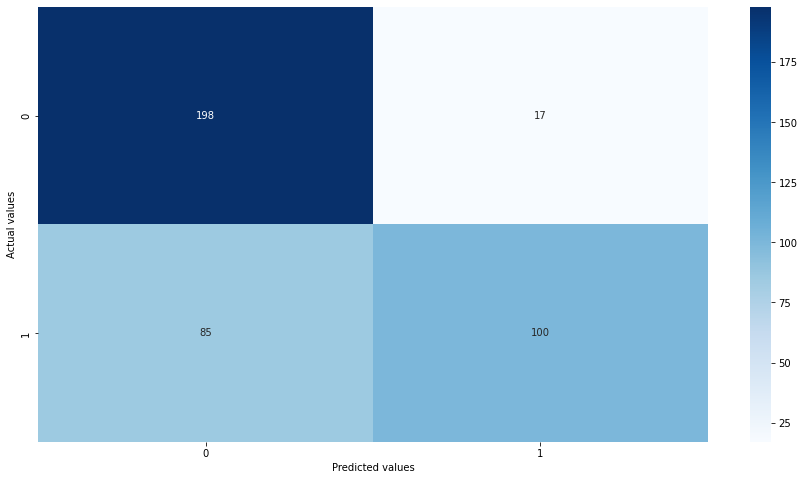

In [25]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, svm_pred)

0.745

In [28]:
#Tuning the C parameters

In [29]:
svm = SVC(kernel = 'rbf', C = 150)

In [30]:
svm.fit(X_train, y_train)

SVC(C=150)

In [31]:
svm_pred_1 = svm.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, svm_pred_1)
cm

array([[160,  55],
       [ 32, 153]])

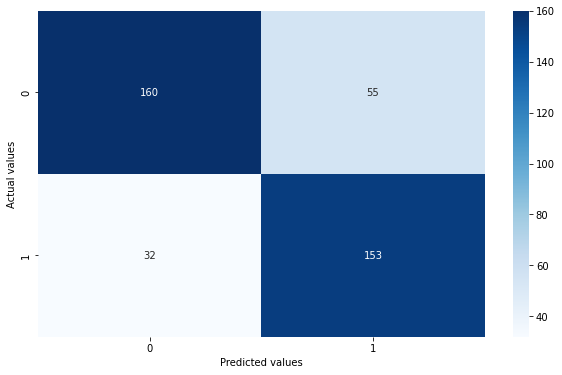

In [33]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [34]:
accuracy_score(y_test, svm_pred_1)

0.7825

In [35]:
svm = SVC(kernel = 'rbf', C = 200)

In [36]:
svm.fit(X_train,y_train)

SVC(C=200)

In [37]:
svm_pred_2 = svm.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, svm_pred_2)
cm

array([[160,  55],
       [ 33, 152]])

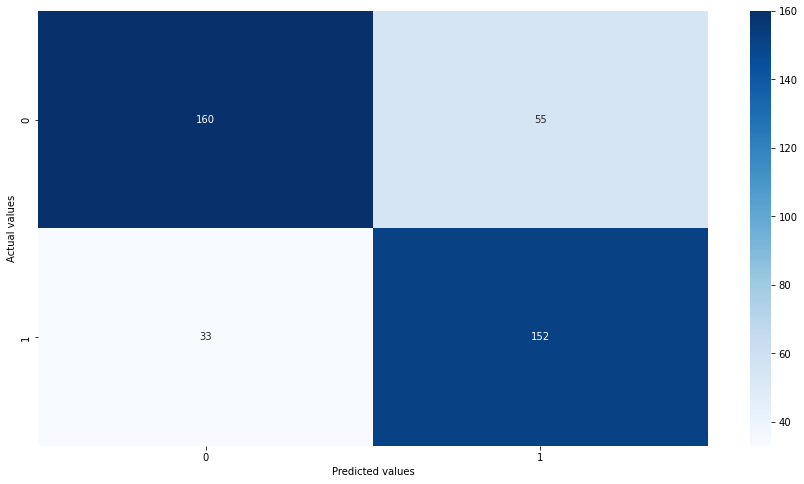

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [40]:
accuracy_score(y_test, svm_pred_2)

0.78

In [41]:
#Polynomial Kernal

In [42]:
svm_poly = SVC(kernel = 'poly')

In [43]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [44]:
svm_poly_pred = svm.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, svm_poly_pred)
cm

array([[160,  55],
       [ 33, 152]])

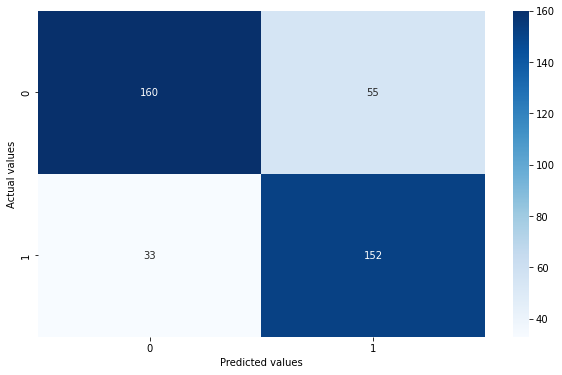

In [46]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [47]:
accuracy_score(y_test, svm_poly_pred)

0.78

In [48]:
svm_poly = SVC(kernel = 'poly', C = 125)

In [49]:
svm_poly.fit(X_train,y_train)

SVC(C=125, kernel='poly')

In [50]:
svm_poly_pred_1 = svm_poly.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, svm_poly_pred_1)
cm

array([[157,  58],
       [ 34, 151]])

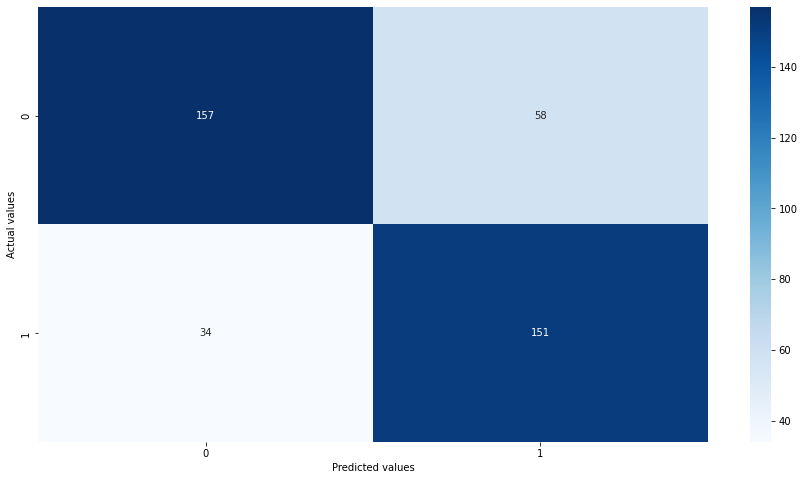

In [52]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [53]:
accuracy_score(y_test, svm_poly_pred_1)

0.77

In [54]:
svm_poly = SVC(kernel = 'poly', C = 340)

In [55]:
svm_poly.fit(X_train,y_train)

SVC(C=340, kernel='poly')

In [56]:
svm_poly_pred_2 = svm_poly.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, svm_poly_pred_2)

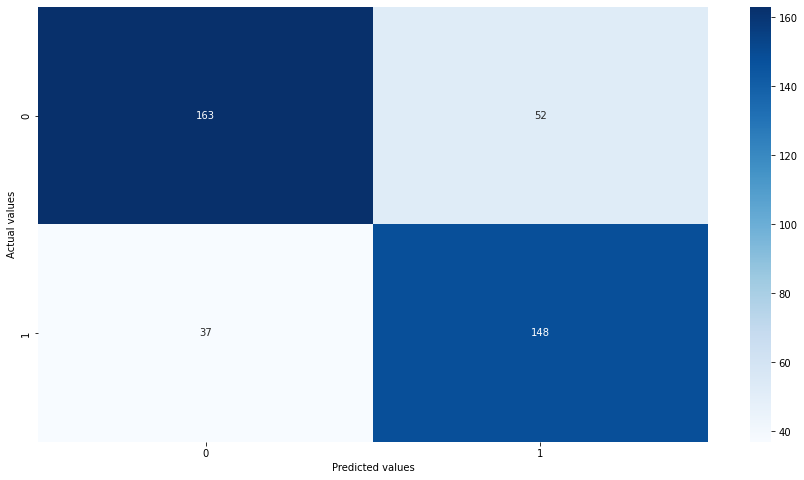

In [58]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [59]:
accuracy_score(y_test, svm_poly_pred_2)

0.7775

In [60]:
#Linear Kernal

In [61]:
svm_lin = SVC(kernel = "linear")

In [62]:
svm_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [63]:
y_pred_lin = svm_lin.predict(X_test)

In [64]:
cm = confusion_matrix(y_test, y_pred_lin)

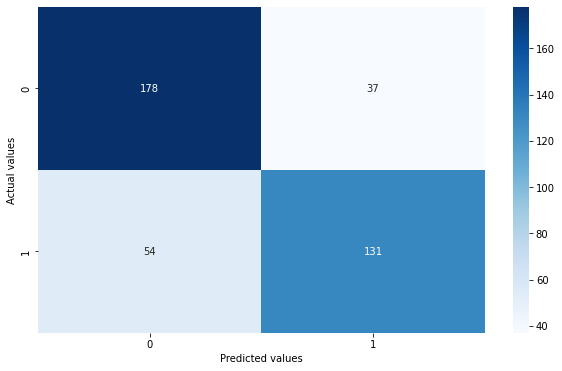

In [65]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [66]:
accuracy_score(y_test, y_pred_lin)

0.7725

In [67]:
svm_lin = SVC(kernel = "linear", C = 85)

In [68]:
svm_lin.fit(X_train,y_train)

SVC(C=85, kernel='linear')

In [69]:
y_pred_lin1 = svm_lin.predict(X_test)

In [70]:
cm = confusion_matrix(y_test, y_pred_lin1)
cm

array([[187,  28],
       [ 64, 121]])

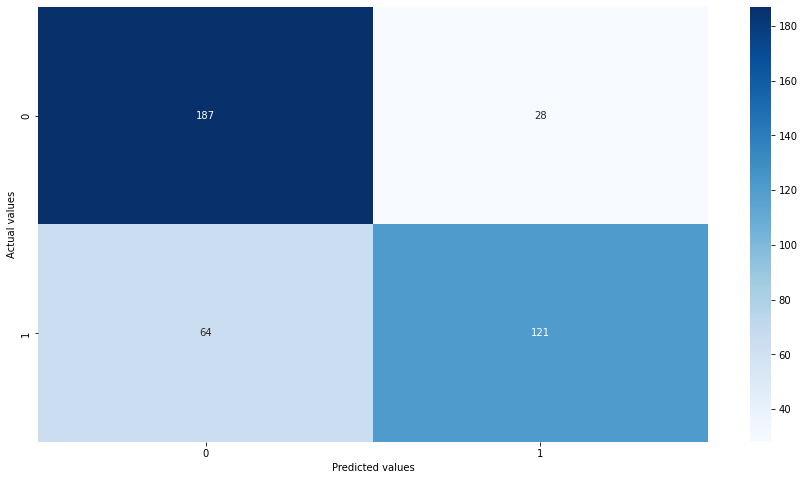

In [71]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [72]:
accuracy_score(y_test, y_pred_lin1)

0.77

In [73]:
svm_lin = SVC(kernel = "linear", C = 150)

In [74]:
svm_lin.fit(X_train,y_train)

SVC(C=150, kernel='linear')

In [75]:
y_pred_lin2 = svm_lin.predict(X_test)

In [76]:
cm = confusion_matrix(y_test, y_pred_lin2)
cm

array([[186,  29],
       [ 61, 124]])

In [77]:
accuracy_score(y_test, y_pred_lin2)

0.775

In [78]:
df.to_csv('SVM.csv')

In [79]:
train_df.to_csv('SVM_training.csv')

In [80]:
test_df.to_csv('SVM_test.csv')

In [81]:
df.head()

,Visib_miles,Cloud,Feels_like_c,snow_or_not
0,0.00,0.636364,34,no_snow
1,0.00,0.272727,3,no_snow
2,0.17,0.935065,90,no_snow
3,0.00,0.753247,75,no_snow
4,1.79,0.506494,90,no_snow


In [87]:
df['new'] = np.where(df['snow_or_not'] == 'no_snow', 0, 1)

In [88]:
df.head()

,Visib_miles,Cloud,Feels_like_c,snow_or_not,new
0,0.00,0.636364,34,no_snow,0
1,0.00,0.272727,3,no_snow,0
2,0.17,0.935065,90,no_snow,0
3,0.00,0.753247,75,no_snow,0
4,1.79,0.506494,90,no_snow,0


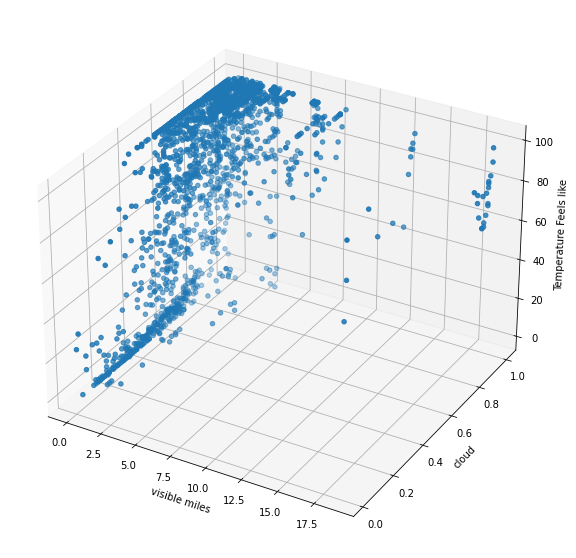

In [91]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(np.array(df['Visib_miles']), np.array(df['Cloud']), np.array(df['Feels_like_c']))

ax.set_xlabel('visible miles')
ax.set_ylabel('cloud')
ax.set_zlabel('Temperature Feels like')

plt.show()